# Analysing COVID-19 Data

The portfolio is all about to analyse the global spread of COVID-19 for the countries in the world.There are number of  open dataset and stories available that show the exponential increase of covid-19 cases for the countries.

Here are some sample stories for reference:

* [From the ABC](https://www.abc.net.au/news/2020-03-26/coronavirus-covid19-global-spread-data-explained/12089028)
* [From the Guardian](https://www.theguardian.com/australia-news/datablog/ng-interactive/2020/apr/06/coronavirus-cases-in-australia-map-curve-confirmed-numbers-stats-how-many-covid-19-nsw-by-postcode-maps-victoria-live-data-qld-sa-wa-tas-nt-act-latest-statistics)
* [Coronavirus in Australia](https://www.covid19data.com.au/)
* [ArcGIS Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) Johns Hopkins

We willuse the dataset of any of the above stories for our analysis.Our aim is to select those dataset that is updating regularly so that we can see the exponential increase in the cases for each counrty


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Getting the Data

We will be using the dataset of Johns Hopkins University.We will only extracting the global confirmed cases dataset from the repository and do our analysis on it.

We can either download a copy of the data into your project or just read it from the URL. The advantage of reading the URL is that we will get live updates, but this can make our analysis harder as the data changes daily.Also, we would be making new requests for data every time we ran our worksheet, this will put load on the server.

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

In [3]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61


## Explore the Data
For the analysis we want the data to be summarize on countries based.The information we get from the dataset are territorywise or state wise, so our first operation is to combine all of the rows for countries that are split into states. We then drop the non-numeric columns, so that we left  just with the number of cases on each day for each country and store this new dataframe.

In [4]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
Albania,0,0,0,0,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
Algeria,0,0,0,0,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
Andorra,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61


Since the new dataframe will have the grouped values.So, our first task is to analyse the data for one country and plot it.We can see the exponential rise in numbers of cases over time.

In [5]:
df=grouped.loc[['India']].T
df_rename=df.rename(columns={"India":'Cases'})
df_rename.head()

Country/Region,Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


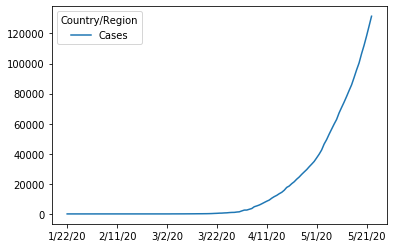

In [6]:
df_rename.plot()
plt.show()

I have locate the data for "India" by using the loc method and uses line graph to plot the cases for India,x-axis in the graph represent the date and y-axis represent the total number of cases.We can see that earlier India has least number of cases but as time increases the cases get increases and now it has crosses the value of 100k 

## Comparing Countries

One of the classic displays in the news is the comparison between countries.We will implement the same thing by selecting a suitable number of countries and plot their data on the same graph to reproduce this visualisation.We should those countries that  would  have significant outbreaks for e.g. China, USA, Italy, UK, Australia. 

In [7]:
grp_plt=grouped.loc[["Australia","China","Italy","US","United Kingdom"]]
grp=grp_plt.T

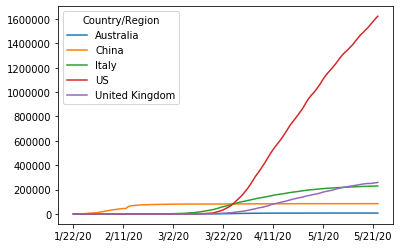

In [8]:
grp.plot()
plt.show()

We have selected these 5 countries "Australia","China","Italy","US","United Kingdom" as they have large number of difference in the coronavirus cases.Again, we have plot the line graph to see the increase in the number of covid cases among these countries.Each country represent by different color of line.

1)It is clearly visible that red line represent most number of cases, red line is represented by "US".So, it can be easily  interpretated that US has most number of coronavirus cases among these countries and it is increasing rapidly.

2)Blue line has least number of cases among these countries, blue line is represented by "Australia".So, it can be stated that
Australia has least number of cases and it is also visible that Australia do not have have any new coronavirus cases among
there people as the line is constant in the graph

3)"Italy" and "United Kingdom"have comparatively same number of cases,Green and purple lines are used to represent "Italy" and "United Kingdom".

4)China is represented by orange line, it can be seen that China has first maximum number of cases but now they have control it to some extent and they have do not have new cases today

Another important visualisation is to shows the data for different countries aligned from the time that they have 100 confirmed cases.To create this figure, we need to take only that part of each time series whose value is greater than or equal to 100 and then plot this on the graph starting at 0 on the x-axis.

In [9]:
#selecting some countries that has significance difference in there covid cases
grp_plt=grouped.loc[['Australia','China','Italy','US','United Kingdom']]
grp_plt=grp_plt.T
#Extracting values greater than 100 from each time.
grp=grp_plt[grp_plt.iloc[:,0:5]>= 100]
grp

Country/Region,Australia,China,Italy,US,United Kingdom
1/22/20,NaN,548,NaN,NaN,NaN
1/23/20,NaN,643,NaN,NaN,NaN
1/24/20,NaN,920,NaN,NaN,NaN
1/25/20,NaN,1406,NaN,NaN,NaN
1/26/20,NaN,2075,NaN,NaN,NaN
...,...,...,...,...,...
5/19/20,7072.0,84063,226699.0,1528568.0,250138.0
5/20/20,7081.0,84063,227364.0,1551853.0,249619.0
5/21/20,7095.0,84063,228006.0,1577147.0,252246.0
5/22/20,7099.0,84081,228658.0,1600937.0,255544.0


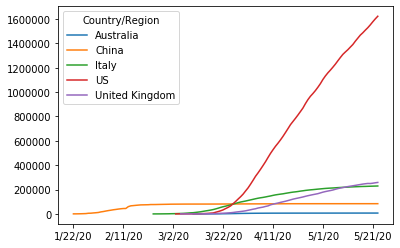

In [10]:
grp.plot.line()
plt.show()

To see this type of visualization, we have selected the above 5 countries "Australia","China","Italy","US","United Kingdom".
From the graph, The difference between the orange line and the rest of lines clearly indicates that China is the first country that have 100 confirm cases earlier and after that all the other countries US, UK, Italy and Australia has crossed 100 confirm cases, but today China has control there cases but cases in US are increasing constantly.

## Normalisation by Population

We will compare the total population of the country with the number of coronoavirus cases.It would be interesting to see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population.

To answer these questions we need population data. We will be using the data from the any of the below dataset:-

[datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) 

[United Nations Population Dynamics page](https://population.un.org/wpp/Download/Standard/CSV/)  

We will use the data sets from United Nations Population growth as it can predict the population upto 2100 in csv format. We will compute the number of confirmed cases for each country per million population and  plot the data on the graph to see and  which country has the most cases per million today.



In [11]:
df_pop=pd.read_csv('data/WPP2019_TotalPopulationBySex.csv')  
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [12]:
#Extracting only location and Total population for each country and store in new dataframe
Tot_pop = pd.DataFrame(df_pop,columns=['Location','PopTotal'])
Tot_pop

,Location,PopTotal
0,Afghanistan,7752.117
1,Afghanistan,7840.151
2,Afghanistan,7935.996
3,Afghanistan,8039.684
4,Afghanistan,8151.316
...,...,...
280927,Zimbabwe,21836.893
280928,Zimbabwe,21355.988
280929,Zimbabwe,20689.956
280930,Zimbabwe,19892.080


As the  data in the file is state or territory wise so we will group the data on country basis and store it in new dataframe

In [13]:
Tot_pop=Tot_pop.replace("United States of America","US")
totalpop = Tot_pop.groupby('Location',group_keys=False).sum().reset_index().rename(columns={'Location':'country'})
pd.options.display.float_format = '{:,.0f}'.format
df_pop=pd.DataFrame(totalpop)

df_pop.head()

,country,PopTotal
0,Afghanistan,"63,768,456"
1,Africa,"2,486,424,382"
2,African Group,"275,355,065"
3,African Union,"275,455,527"
4,African Union: Central Africa,"36,332,725"


We will sum the total cases for each country and store the data in the new dataframe

In [14]:
grpd=pd.DataFrame(grouped)
grpd['totalcases']=grpd.groupby(['Country/Region'],as_index=False)['5/13/20'].transform('sum')
covidcases=pd.DataFrame(grpd,columns=['totalcases']).reset_index().rename(columns={'Country/Region':'country'})
covidcases.head()

,country,totalcases
0,Afghanistan,5226
1,Albania,880
2,Algeria,6253
3,Andorra,760
4,Angola,45


In [15]:
#Merge the two dataset into one dataset and store it in new dataframe.
covid_pop=pd.merge(df_pop, covidcases, how='inner', on='country', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
covid_pop.head()

,country,PopTotal,totalcases
0,Afghanistan,"63,768,456",5226
1,Albania,"2,051,488",880
2,Algeria,"54,028,510",6253
3,Andorra,"60,246",760
4,Angola,"84,885,830",45


In [16]:
#Calculate the total number of cases per million for each country
for i in range(len(covid_pop)):
    covid_pop['cases/pop']=((covid_pop['totalcases']/(covid_pop['PopTotal']))*1000000)
print(covid_pop.sort_values(by = 'cases/pop', ascending=False).head(20))

            country    PopTotal  totalcases  cases/pop
131      San Marino      27,248         643     23,598
68         Holy See         666          12     18,011
3           Andorra      60,246         760     12,615
125           Qatar   3,030,240       26539      8,758
144           Spain  35,585,924      228691      6,426
92       Luxembourg     662,960        3904      5,889
71          Iceland     316,927        1802      5,686
16          Belgium  10,429,193       53981      5,176
138       Singapore   5,079,757       25346      4,990
77            Italy  45,058,408      222104      4,929
75          Ireland   4,761,253       23401      4,915
157              US 325,072,549     1390406      4,277
124        Portugal   7,603,680       28132      3,700
149     Switzerland   8,276,694       30413      3,675
161  United Kingdom  63,317,303      230985      3,648
15          Belarus   7,430,888       25825      3,475
12          Bahrain   1,830,307        5816      3,178
55        

<Figure size 3600x1800 with 0 Axes>

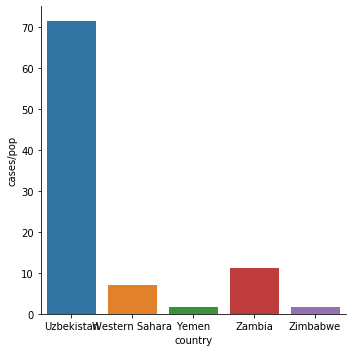

In [17]:
plt.figure(figsize=(50,25))
sns.catplot(x="country", y="cases/pop", kind="bar", data=covid_pop.tail(5))

## A Predictive Model

From our above analysis we can find that the graph follow exponential pattern.An exponential curve has the equation $y = e^{mx}$. It can be converted to a linear relationship by taking the logarithm of each side: $log(y) = mx$.  This means that we can fit a linear regression model to the data as long as we take the log of the number of cases.

So, to build Linear regression model, we will select a country that has maximum number of coronovirus cases and then predict the log of number of cases.We will train our model on one of country data and test of model on another country of data.

So, by using that metric we can find out which country has control the spread of virus and which country is still not able to control it.

We have selected one Country like US and build a linear regression model to predict the log of number of cases

In [18]:
X=np.arange(len(grouped.loc['US'])).reshape(-1,1)

In [19]:
# Store the value of log(X)in y
y=grouped.loc['US'].values
y.shape

(124,)

In [20]:
y=y.reshape(-1,1)

In [21]:
model=LinearRegression(fit_intercept=True, normalize=True)
model.fit(X,np.log(y))
Y_predict=np.exp(model.predict(X))

We have plot two graph below.First graph is the number of cases on each day of US.Second graph is to plot the log of number of cases for US

<function matplotlib.pyplot.show(*args, **kw)>

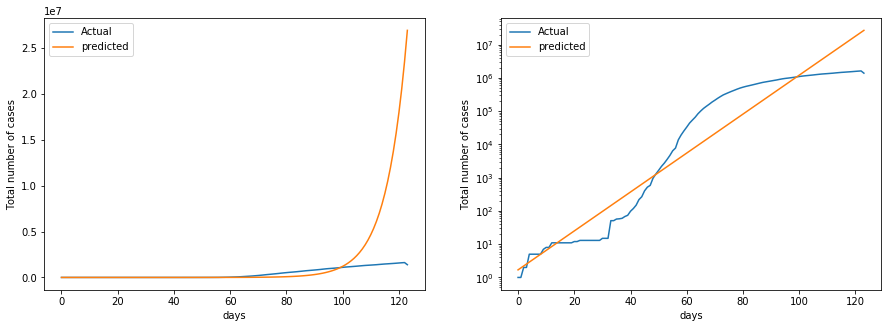

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y)
plt.plot(Y_predict)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.legend(['Actual','predicted'])
plt.show

plt.subplot(1,2,2)
plt.plot(y)
plt.plot(Y_predict)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.yscale('log')
plt.legend(['Actual','predicted'])
plt.show

In the above graph, we plot two graph,one graph shows the the numerical increase the number of cases in US and the other graph shows the exponential increase in the number of cases of US

Now,we will test our model on China covid cases.We will use Train dataset to predict the exponential increase of cases in China.

In [23]:
Y_china=(grouped.loc['China'].values)
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X,np.log(Y_china))
Y_pred=np.exp(mod.predict(X))

Again,we have plot two graph below.First graph is the number of cases on each day of China.Second graph is to plot the log of number of cases for China

<function matplotlib.pyplot.show(*args, **kw)>

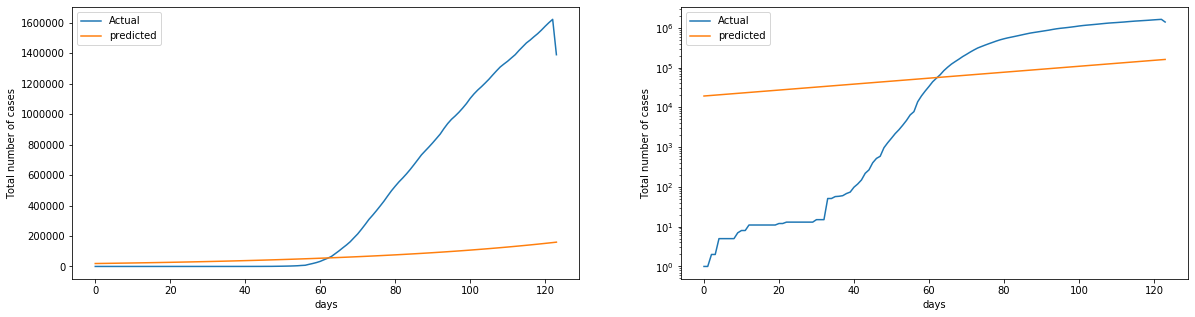

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(y)
plt.plot(Y_pred)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.legend(['Actual','predicted'])
plt.show

plt.subplot(1,2,2)
plt.plot(y)
plt.plot(Y_pred)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.yscale('log')
plt.legend(['Actual','predicted'])
plt.show

Now , we have tested our model on the limited number of day for China.Again we fir our model on the basis of number days and
and can see the If China had not acted to stop the virus, there number of cases can exceed the number of cases of US

<function matplotlib.pyplot.show(*args, **kw)>

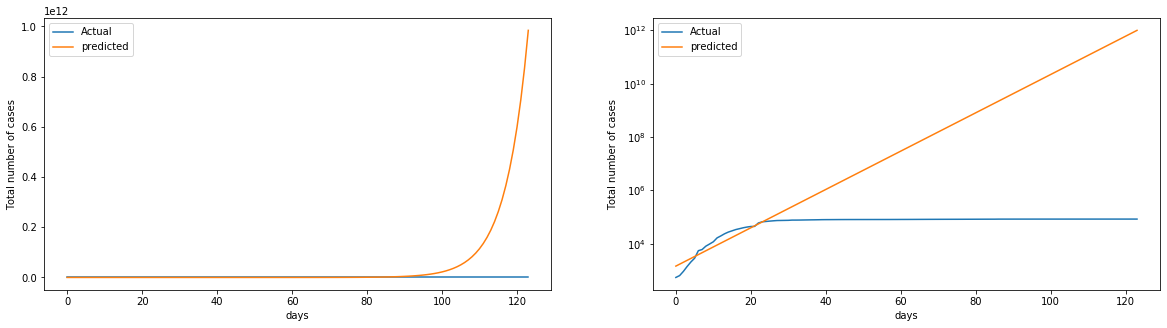

In [26]:
est=LinearRegression()
est.fit(X[:30],np.log(Y_china[:30]))
Y_pred_China=np.exp(est.predict(X))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(Y_china)
plt.plot(Y_pred_China)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.legend(['Actual','predicted'])
plt.show

plt.subplot(1,2,2)
plt.plot(Y_china)
plt.plot(Y_pred_China)
plt.ylabel('Total number of cases')
plt.xlabel('days')
plt.legend(['Actual','predicted'])
plt.yscale('log')
plt.show

In the above, test our model for just 20 number of days for China, and can see that that if China does not take any measure their value can cross more than a millio today but after some days , they just take some good measures and cases is decreases.

# Conclusion

Our above portfolio is bases on the spread of coronavirus cases in the world.We have use some techniques to analyse the dataset of the increasing number of cases in the world.
From the above analysis, we can interpret that:-

1.Coronavirus is deadly virus that is increases day by day, till now the only solution of this virus is social distancing as we can see from our model, the cases in China decreases when they adopt social distancing measure.

2.We have also compared the cases on Country based and find out which Country has maximum number of per million cases.We have used Normalization technique and can see that US has maximum number of cases toady but they have minimum per million cases.So we can say that the country that has more population will have minimum per million cases to the country that have minimum population has maximum per million cases.